<a href="https://colab.research.google.com/github/DAVIDKSOUSA/DATA_SCIENCE/blob/master/Curso_Udemy_Finance_for_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Curso Udemy

In [1]:
#Importando as bibliotecas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as wb


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Importando dados da API do yahoo finance.
df = wb.DataReader("PETR4.SA", data_source = "yahoo", start = "2015-1-1")
df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,9.99,9.35,9.99,9.36,49559500.0,8.683939
2015-01-05,9.19,8.53,9.14,8.56,78385100.0,7.941722
2015-01-06,8.83,8.04,8.71,8.28,84723300.0,7.681945
2015-01-07,8.73,8.36,8.56,8.67,85531000.0,8.043777
2015-01-08,9.39,8.74,8.79,9.23,83306300.0,8.563329


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1315 entries, 2015-01-02 to 2020-04-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1315 non-null   float64
 1   Low        1315 non-null   float64
 2   Open       1315 non-null   float64
 3   Close      1315 non-null   float64
 4   Volume     1315 non-null   float64
 5   Adj Close  1315 non-null   float64
dtypes: float64(6)
memory usage: 71.9 KB


In [0]:
#Importando apenas o Adj Close de uma determinada carteira.
carteira = ["PETR4.SA", "VALE3.SA", "ABEV3.SA"]
df_carteira = pd.DataFrame()
for acoes in carteira:
  df_carteira[acoes] = wb.DataReader(acoes, data_source = "yahoo", start = "2015-1-1")["Adj Close"]
  


In [5]:
df_carteira.head()

,PETR4.SA,VALE3.SA,ABEV3.SA
Date,,,
2015-01-02,8.683939,17.994938,13.735766
2015-01-05,7.941722,17.724333,13.487113
2015-01-06,7.681945,18.434660,14.001563
2015-01-07,8.043777,19.111164,14.198765
2015-01-08,8.563329,19.314112,14.264312


In [6]:
#Calcular a taxa de retorno simples  - Geralmente é mais utilizado para comparar ativos diferentes.
df["retorno_simples"] = (df["Adj Close"]/df["Adj Close"].shift(1)) -1
print(df["retorno_simples"])

Date
2015-01-02         NaN
2015-01-05   -0.085470
2015-01-06   -0.032710
2015-01-07    0.047102
2015-01-08    0.064590
                ...   
2020-04-14   -0.011813
2020-04-15   -0.020921
2020-04-16   -0.040293
2020-04-17    0.026081
2020-04-20   -0.011159
Name: retorno_simples, Length: 1315, dtype: float64


In [7]:
#Transformar em uma DataFrame. (NaN - Not a Number)
pd.DataFrame(df["retorno_simples"])

,retorno_simples
Date,
2015-01-02,NaN
2015-01-05,-0.085470
2015-01-06,-0.032710
2015-01-07,0.047102
2015-01-08,0.064590
...,...
2020-04-14,-0.011813
2020-04-15,-0.020921
2020-04-16,-0.040293


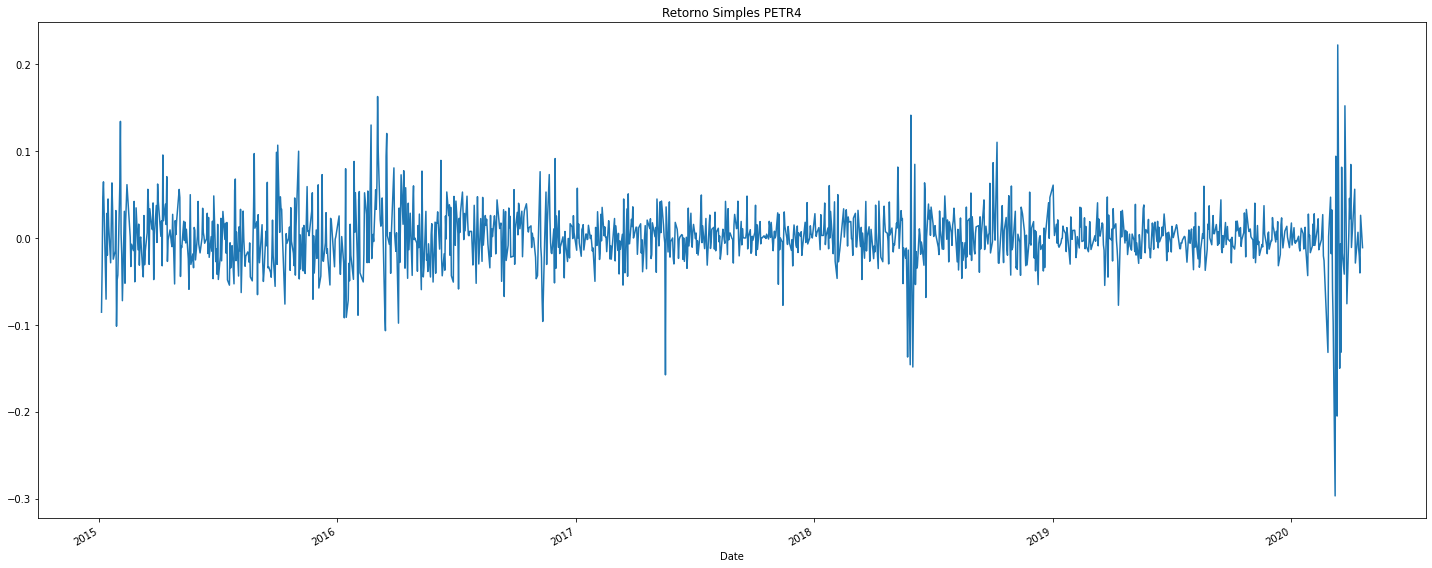

In [8]:
#Plotar em um gráfico.
fig, ax = plt.subplots()
df["retorno_simples"].plot(figsize = (20,8))
ax.set_title("Retorno Simples PETR4")
plt.tight_layout();

In [9]:
#Calcular a taxa média de retorno diária .mean().
taxa_retorno_diaria = df["retorno_simples"].mean()
print("Taxa Média de Retorno Diário:", taxa_retorno_diaria*100,"%")



Taxa Média de Retorno Diário: 0.10705206883362549 %


In [10]:
#Calcular a taxa média de retorno anual.
taxa_retorno_anual = df["retorno_simples"].mean()*250
taxa_retorno_anual

0.2676301720840637

In [11]:
#arredondar o valor e transformar em uma string.
print(str(round(taxa_retorno_anual, 5) * 100),"%") 

26.762999999999998 %


In [12]:
#Calcular a taxa de Retorno Logarítimico - Geralmente é utilizado com um único ativo.
df.head(3)

,High,Low,Open,Close,Volume,Adj Close,retorno_simples
Date,,,,,,,
2015-01-02,9.99,9.35,9.99,9.36,49559500.0,8.683939,NaN
2015-01-05,9.19,8.53,9.14,8.56,78385100.0,7.941722,-0.08547
2015-01-06,8.83,8.04,8.71,8.28,84723300.0,7.681945,-0.03271


In [13]:
df["retorno_logaritmico"] = np.log(df["Adj Close"]/df["Adj Close"].shift(1))
df["retorno_logaritmico"]

Date
2015-01-02         NaN
2015-01-05   -0.089345
2015-01-06   -0.033257
2015-01-07    0.046026
2015-01-08    0.062590
                ...   
2020-04-14   -0.011884
2020-04-15   -0.021142
2020-04-16   -0.041127
2020-04-17    0.025747
2020-04-20   -0.011222
Name: retorno_logaritmico, Length: 1315, dtype: float64

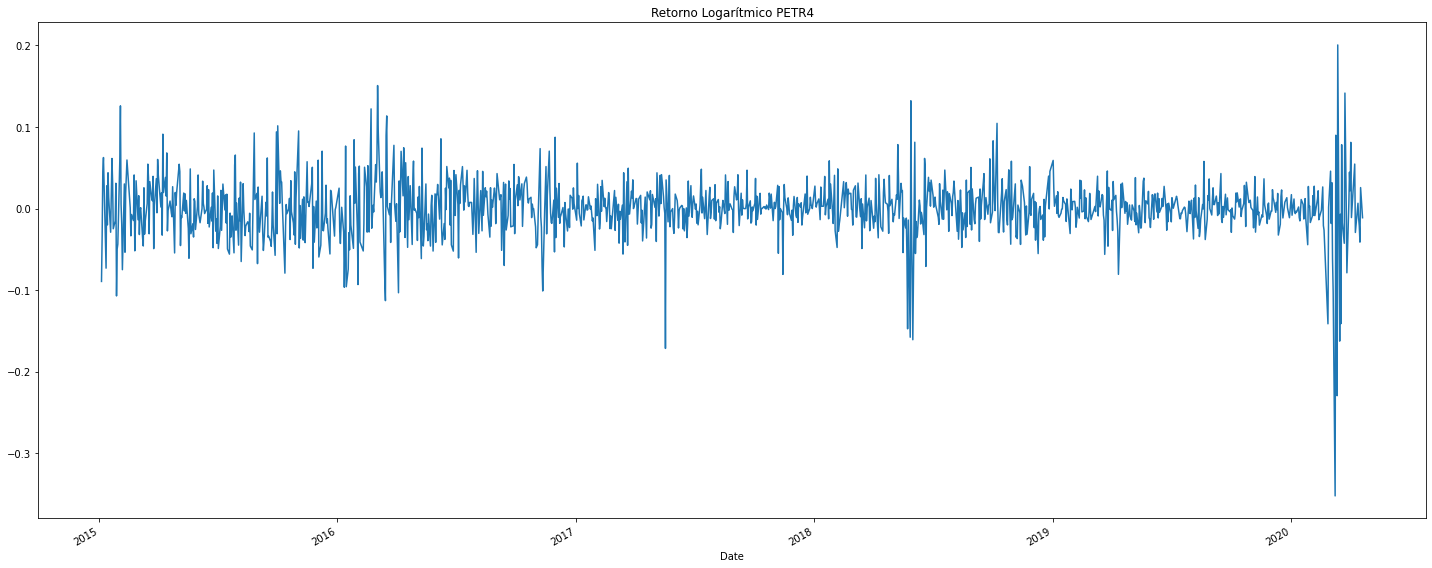

In [14]:
fig, ax = plt.subplots()
df["retorno_logaritmico"].plot(figsize = (20,8))
ax.set_title("Retorno Logarítmico PETR4")
plt.tight_layout();

In [15]:
#Calcular a taxa média de retorno diária .mean().
taxa_retorno_logaritmico_diaria = df["retorno_logaritmico"].mean()
print("Taxa Média de Retorno Logarítmico Diário:", taxa_retorno_logaritmico_diaria * 100,"%")



Taxa Média de Retorno Logarítmico Diário: 0.04626967975534144 %


In [16]:
taxa_retorno_logaritmico_anual = df["retorno_logaritmico"].mean() * 250
taxa_retorno_logaritmico_anual

0.1156741993883536

In [17]:
print(str(round(taxa_retorno_logaritmico_anual,5)*100),"%")

11.567 %


#Calcular a taxa de retorno de um portifólio

In [18]:
df_carteira.head()

,PETR4.SA,VALE3.SA,ABEV3.SA
Date,,,
2015-01-02,8.683939,17.994938,13.735766
2015-01-05,7.941722,17.724333,13.487113
2015-01-06,7.681945,18.434660,14.001563
2015-01-07,8.043777,19.111164,14.198765
2015-01-08,8.563329,19.314112,14.264312


In [19]:
#Normalizar para a base 100.
df_carteira.iloc[0]

PETR4.SA     8.683939
VALE3.SA    17.994938
ABEV3.SA    13.735766
Name: 2015-01-02 00:00:00, dtype: float64

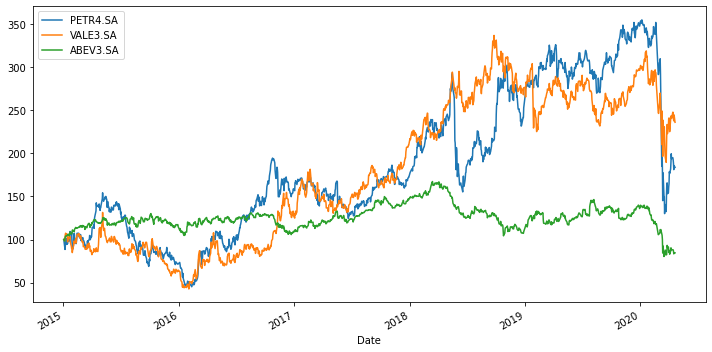

In [20]:
#Criar um gráfico de linhas para analisa io comportamento dos ativos no período.
(df_carteira/df_carteira.iloc[0]*100).plot(figsize = (10,5))
plt.tight_layout();

In [0]:
retorno_carteira = (df_carteira/df_carteira.shift(1)) - 1 

In [0]:
#Transformar os pesos em uma matrix
pesos = np.array([0.25, 0.5, 0.25])

In [23]:
#Multiplicar as matrizes
np.dot(retorno_carteira, pesos)

array([        nan, -0.0334121 ,  0.02139656, ..., -0.024707  ,
        0.02429501, -0.02007433])

In [24]:
#Respectivo retorno anual de cada ativo
retorno_carteira_anual = retorno_carteira.mean()*250
retorno_carteira_anual

PETR4.SA    0.267630
VALE3.SA    0.297706
ABEV3.SA    0.001504
dtype: float64

In [25]:
#Multiploicar o retorno anual pelo pesos achamos o retono anual da carteira
np.dot(retorno_carteira_anual, pesos)

0.21613628949876226

In [26]:
#Comparar o retorno anual da minha carteira com o de outra.
pesos_2 = np.array([0.25, 0.4, 0.35])

pfolio_1 = str(round(np.dot(retorno_carteira_anual, pesos), 5)*100)+"%"
pfolio_2 = str(round(np.dot(retorno_carteira_anual, pesos_2), 5)*100)+"%"

print(pfolio_1)
print(pfolio_2)

21.614%
18.651999999999997%


In [0]:
#Comparaçao indices e minha carteira.
indices = ["^BVSP","^GSPC"]
df_indices = pd.DataFrame()
for t in indices:
   df_indices[t] = wb.DataReader(t, data_source = "yahoo", start = '2015-01-01')['Adj Close']

In [28]:
df_indices.head()

,^BVSP,^GSPC
Date,,
2015-01-02,48512.0,2058.199951
2015-01-05,47517.0,2020.579956
2015-01-06,48001.0,2002.609985
2015-01-07,49463.0,2025.900024
2015-01-08,49943.0,2062.139893


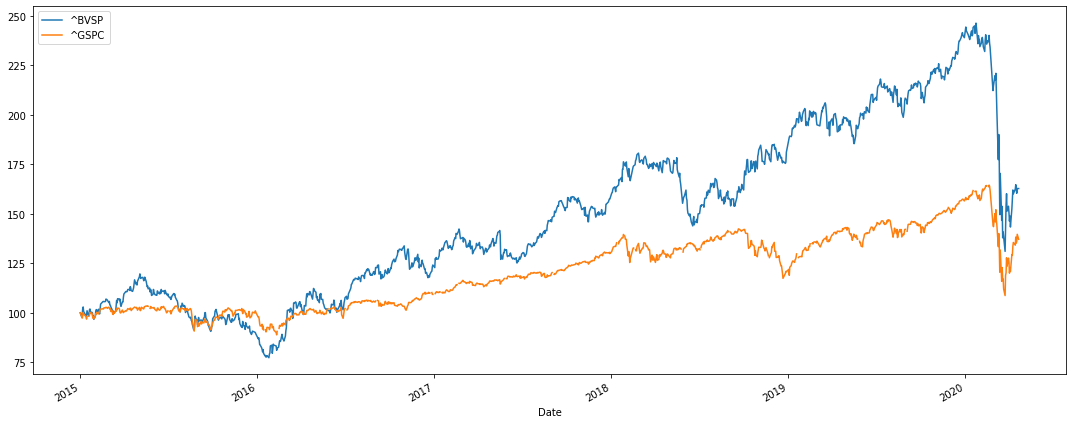

In [29]:
(df_indices/df_indices.iloc[0]*100).plot(figsize=(15,6))
plt.tight_layout();

In [30]:
#Calcular os retornos simples dos índices.
df_indices_retorno = (df_indices/df_indices.shift(1)) -1
df_indices_retorno.head()

,^BVSP,^GSPC
Date,,
2015-01-02,NaN,NaN
2015-01-05,-0.020510,-0.018278
2015-01-06,0.010186,-0.008893
2015-01-07,0.030458,0.011630
2015-01-08,0.009704,0.017888


In [31]:
#Aparentemente o IBOV superou o SP 500
df_indices_retorno_anual = df_indices_retorno.mean()*250
df_indices_retorno_anual

^BVSP    0.130927
^GSPC    0.093332
dtype: float64

#Como medir o risco de um ativo.



In [0]:
tickers = ["PETR4.SA", "VALE3.SA"]
sec_data = pd.DataFrame()
for t in tickers :
  sec_data[t] = wb.DataReader(t, data_source = "yahoo", start = "1990-01-01")["Adj Close"]


In [33]:
sec_data.head(3)

,PETR4.SA,VALE3.SA
Date,,
2000-01-03,4.050402,2.266039
2000-01-04,3.826338,2.212088
2000-01-05,3.787730,2.212088


In [0]:
sec_returns = np.log(sec_data/sec_data.shift(1))

In [35]:
sec_returns

,PETR4.SA,VALE3.SA
Date,,
2000-01-03,NaN,NaN
2000-01-04,-0.056908,-0.024096
2000-01-05,-0.010141,0.000000
2000-01-06,-0.003464,0.000000
2000-01-07,0.004556,0.035932
...,...,...
2020-04-14,-0.011884,-0.000898
2020-04-15,-0.021142,-0.030554
2020-04-16,-0.041127,-0.010006


In [36]:
sec_returns['PETR4.SA'].mean()*250

0.06865571824000294

In [37]:
#Lembrar de tirar a raiz quadrada de 250, pois o std é a raiz da variância.
sec_returns['PETR4.SA'].std()*250**0.5

0.4335063552868852

In [38]:
#Para compara as duas em empresas basta verificar a que tem menor desvio padrao com o maior retorno
#basta fazer o mesmo método para vale.

#temos que utilizar dois colchetes pois representa um array com duas dimensões.
sec_returns[["PETR4.SA", "VALE3.SA"]].mean()*250

PETR4.SA    0.068656
VALE3.SA    0.146801
dtype: float64

In [39]:
sec_returns[["PETR4.SA", "VALE3.SA"]].std()*250**0.5

PETR4.SA    0.433506
VALE3.SA    0.421814
dtype: float64

#Relação entre ativos financeiros

In [40]:
#Como quantificar o retorno de dois ativos.
petr_var = sec_returns['PETR4.SA'].var()*250
petr_var

0.18792776007411915

In [41]:
vale_var = sec_returns['VALE3.SA'].var()*250
vale_var

0.17792701589953466

In [42]:
#Calculo da Covariancia
#Observar que a Covariancoa entre petr e petr é a propria variacia de petr
cov_matrix = sec_returns.cov()*250 #anual
cov_matrix

,PETR4.SA,VALE3.SA
PETR4.SA,0.187928,0.091727
VALE3.SA,0.091727,0.177927


In [43]:
#Calculo da 
#Essa é a correlação dos retornos e nao dos precos.
#Nao anulaizar pois nao nos traz retornos medios diarios apenas  a correlcao entre retornos.
#O que importa para um investidor é o retorno e nao o preco, por isso o cálculo foi realizado em cima do retorno.
corr_matrix = sec_returns.corr()
corr_matrix

,PETR4.SA,VALE3.SA
PETR4.SA,1.000000,0.501564
VALE3.SA,0.501564,1.000000


#Calculando o Risco de um Portifólio

In [0]:
pesos =np.array([0.5, 0.5])

In [45]:
#Variancia de um portifolio
pfolio_var = np.dot(pesos.T, np.dot(sec_returns.cov()*250, pesos))
print (str(round(pfolio_var, 5)*100)+"%")

13.733%


In [46]:
#calculo da volatilidade do portifolio é a raiz quadrada da variancia
pfolio_vol = np.dot(pesos.T, np.dot(sec_returns.cov()*250, pesos))**0.5
pfolio_vol

0.370576591829934

In [47]:
print (str(round(pfolio_vol, 5)*100)+"%")

37.058%


#Cálculo do Rsico Diversificável e não diversificável.

O risco de um  carteira pod ser descrito com a soma de dois componetes: a variancoa dos ativos na carteira e o produtos entre o produto da covariancia entre as acoes e seus desvio padrao.





*   Risco não diversificáve 
Este componente depende da Variancia de cada ativo, também conhecido como *Risco Sistemático*.


*   Risco Diversificável

Tambvém conhecido como Risco Idiossincrático é o risco específico de uma empresa.Impulsinado por eventods específicos da emopresa.







In [48]:
#Risco Diversificável de um Portifólio = Variância do Portifólio - Variância Anual Ponderada de cada ação.
#cada par de colchetes adicional ao redor da colua adicioan uma dimensao a matrix numpy



weights = np.array([0.5,0.5])

#Risco diversificável.

petr4_var_a = sec_returns[["PETR4.SA"]].var()*250

vale3_var_a = sec_returns[["VALE3.SA"]].var()*250

diversifiable_risk = pfolio_var - (weights[0]**2*petr4_var_a) - (weights[1]**2**vale3_var_a)
diversifiable_risk


##Aos invés de um número decimal obteremos um vetor sem número, por isso deve-se ter cuidado ao criar vetores numpy.





PETR4.SA   NaN
VALE3.SA   NaN
dtype: float64

In [49]:
#Técnicas para resolver esse problema. Como a varinacia da petr4 é armazenada em uma matrix 1X1, 
#esse irá ser um valor único. Então pode-se tranformar esse valor em um decimal.

float(petr4_var_a)


0.18792776007411915

In [50]:
#Pode-se utilizar colchetes simples quando indicar que irá utilizar os dados da coluna petr4.
petr4_var_a = sec_returns["PETR4.SA"].var()*250
petr4_var_a

0.18792776007411915

In [51]:
#Aplicar o mesmo método pra VALE3
vale3_var_a = sec_returns["VALE3.SA"].var()*250
vale3_var_a

0.17792701589953466

In [52]:
#Então o diversifiabvle Risk will be.

diversifiable_risk = pfolio_var - (weights[0]**2*petr4_var_a) - (weights[1]**2*vale3_var_a)
diversifiable_risk

0.04586331641887608

In [53]:
print(str(round(diversifiable_risk*100, 2))+"%")

4.59%


In [54]:
#Verificando o risco não diversificável
n_dr_1 = pfolio_var - diversifiable_risk
print(str(round(n_dr_1*100, 2))+"%")

9.15%


In [55]:
n_dr_2 = (weights[0]**2*petr4_var_a) + (weights[1]**2*vale3_var_a)
n_dr_2

0.09146369399341345

In [56]:
n_dr_1 == n_dr_2

True

#Obtendo a Fronteira Eficiente de um grupo de portifólios Composto por dois ativos.


In [58]:
df_carteira

,PETR4.SA,VALE3.SA,ABEV3.SA
Date,,,
2015-01-02,8.683939,17.994938,13.735766
2015-01-05,7.941722,17.724333,13.487113
2015-01-06,7.681945,18.434660,14.001563
2015-01-07,8.043777,19.111164,14.198765
2015-01-08,8.563329,19.314112,14.264312
...,...,...,...
2020-04-14,16.730000,44.529999,12.090000
2020-04-15,16.379999,43.189999,11.910000
2020-04-16,15.720000,42.759998,11.450000


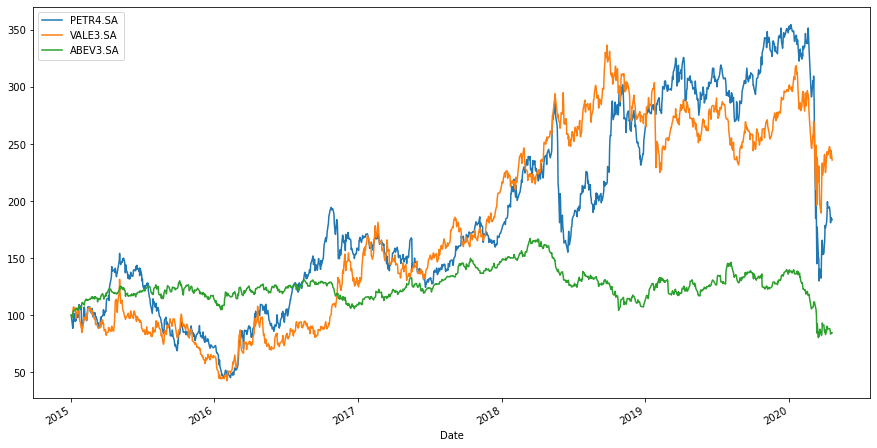

In [62]:
(df_carteira/df_carteira.iloc[0]*100).plot(figsize=(15,8))

In [0]:
#para obeter a fronteira eficiente precisaremos obeter os retornos logaritmos.
log_returns= np.log(df_carteira/df_carteira.shift(1))

In [65]:
log_returns.mean()*250

PETR4.SA    0.115674
VALE3.SA    0.163332
ABEV3.SA   -0.031989
dtype: float64

In [66]:
log_returns.cov()

,PETR4.SA,VALE3.SA,ABEV3.SA
PETR4.SA,0.001229,0.000572,0.000222
VALE3.SA,0.000572,0.001078,0.000160
ABEV3.SA,0.000222,0.000160,0.000270


In [67]:
log_returns.corr()

,PETR4.SA,VALE3.SA,ABEV3.SA
PETR4.SA,1.000000,0.497209,0.385308
VALE3.SA,0.497209,1.000000,0.296999
ABEV3.SA,0.385308,0.296999,1.000000


In [73]:
#definir uma variável que cinta o número de aticos que compoem a carteira 
num_carteira = len(carteira)
num_carteira

3

In [76]:
#Definir dois pessos aleartórios
arr= np.random.random(3)
arr

array([0.05446432, 0.23844652, 0.99386691])

In [80]:
arr[0]+arr[1]+arr[2]

1.2867777470828472

In [81]:
#definir que a soma dos pessos aleatórops somem 1
weights = np.random.random(num_carteira)
weights /= np.sum(weights) #soma das matrizes divididas pelos seus respectivos pesos
weights

array([0.25239391, 0.53491748, 0.21268861])

In [82]:
weights[0]+weights[1]+weights[2]

1.0

###Retorno esperado de um portifólio
Soma da média dos retornos logarítmico anualizados ponderados pelo seus pesos.

In [83]:
np.sum(weights*log_returns.mean())*250

0.10976071408092643

In [84]:
#Variancia
np.dot(weights.T, np.dot(log_returns.cov()*250, weights))

0.15349016787426814

In [85]:
#Volatilidade
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights)))

0.3917782126079348

In [99]:
#Criar um gráfico onde 1000 simulac'ões de média varoância serão plotadas (1000 combinacoes dos mesmos ativos)

pfolio_returns = []
pfolio_volatilities = []

for x in range(2000):
  weights = np.random.random(num_carteira)
  weights /= np.sum(weights)
  pfolio_returns.append(np.sum(weights*log_returns.mean())*250)
  pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights))))

pfolio_returns, pfolio_volatilities

([0.08968346915736339,
  0.11525998901778974,
  0.10805721452691716,
  0.054729258556348,
  0.06876973357948545,
  0.1057180723776061,
  0.0829381592733207,
  0.152363375854691,
  0.09838207844645515,
  0.0573397057296225,
  0.09349765729633149,
  0.11445281713314567,
  0.09019099456180454,
  0.060199257701008826,
  0.1044014165658518,
  0.08018082370410903,
  0.09481837208943358,
  0.10224010544479488,
  0.08763324469049417,
  0.07770254857377554,
  0.06614912934517361,
  0.08675296084026829,
  0.10257907920786108,
  0.07307276454426483,
  0.08571275976021854,
  0.09985128856248077,
  0.10951720871296321,
  0.12988135621623953,
  0.029663786733477568,
  0.06747592836994408,
  0.10755967878055053,
  0.056054586009089455,
  0.045675701648968364,
  0.061874954812322885,
  0.07177700215469245,
  0.049480409063064,
  0.08540574664008378,
  0.10582324312378182,
  0.10706672811161298,
  0.09803062477908848,
  0.0761729030729469,
  0.06613049846047926,
  0.09315547698698683,
  0.0850480378938

In [123]:
#converter essas listas em array
pfolio_returns = []
pfolio_volatilities = []

for x in range(10000):
  weights = np.random.random(num_carteira)
  weights /= np.sum(weights)
  pfolio_returns.append(np.sum(weights*log_returns.mean())*250)
  pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.09696362, 0.09169651, 0.09683345, ..., 0.08139226, 0.06495834,
        0.05481492]),
 array([0.37857128, 0.35860309, 0.3899449 , ..., 0.34644711, 0.34198934,
        0.30906307]))

In [124]:
#Criar um data frame com duas colunas uma com os retornos e outra com as volatilidades
portifolio = pd.DataFrame({"Return": pfolio_returns, "Volatility": pfolio_volatilities})
portifolio.head()

,Return,Volatility
0,0.096964,0.378571
1,0.091697,0.358603
2,0.096833,0.389945
3,0.067175,0.382647
4,0.127652,0.425651


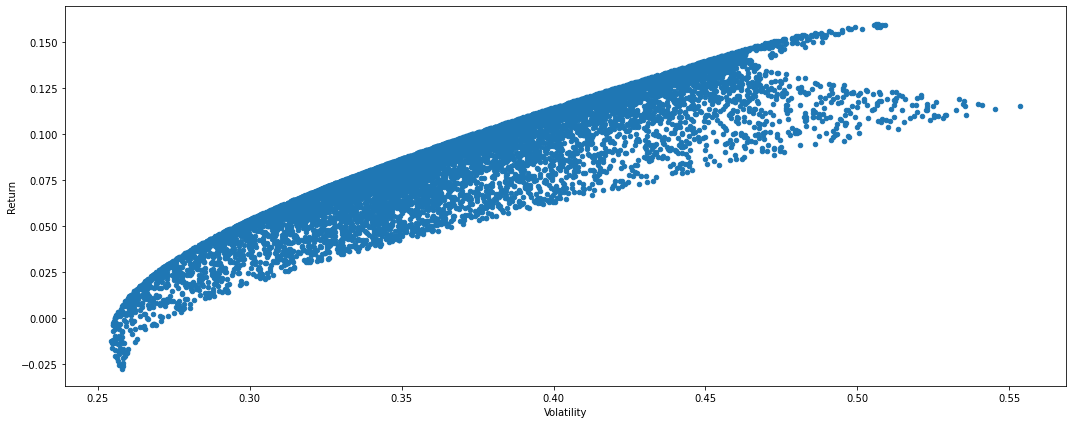

In [125]:
portifolio.plot(x="Volatility", y= "Return", kind= "scatter", figsize=(15,6))
plt.tight_layout();

#Medindo o Beta
Pode ser calculado como a variancia emtre a ação e o mercado dividido pela variância.

In [126]:
#Calculo do Beta
df.head()

,High,Low,Open,Close,Volume,Adj Close,retorno_simples,retorno_logaritmico
Date,,,,,,,,
2015-01-02,9.99,9.35,9.99,9.36,49559500.0,8.683939,NaN,NaN
2015-01-05,9.19,8.53,9.14,8.56,78385100.0,7.941722,-0.085470,-0.089345
2015-01-06,8.83,8.04,8.71,8.28,84723300.0,7.681945,-0.032710,-0.033257
2015-01-07,8.73,8.36,8.56,8.67,85531000.0,8.043777,0.047102,0.046026
2015-01-08,9.39,8.74,8.79,9.23,83306300.0,8.563329,0.064590,0.062590
